# A/B Test

A/B testing is a controlled experiment with two variants - A/B--controll and experiement group. It's a hypothesi tesing to check if there is any statistical/practical difference between the controll and experiment group.<br>
A/B tesint plays a vital rol in website optimization.

## Goal:
### 1. Analyze results from an A/B Test
### 2. Design an algorithm to automate some steps

#### Problem description:<br>
Company XYZ is a world-wide e-commerce company and its Spain-based users have a much higher conversion rate than any other spanish-speaking countries. All spanish-speaking countries' website was transalated by a Spaniard. <br>
They have a hypothesis that website which are translated by local people will have a higher conversion rate. Therefor, they designed the A/B test to test the hypothesis.

In [348]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [288]:
# load two tables into pandas data frame
test = pd.read_csv(r'C:\Users\lshen\Downloads\Translation_Test\test_table.csv')
user = pd.read_csv(r'C:\Users\lshen\Downloads\Translation_Test\user_table.csv')

### Step 1: Data Exploration

In [289]:
test.head()

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test
0,315281,2015-12-03,Direct,Web,ES,NaN,IE,1,0
1,497851,2015-12-04,Ads,Web,ES,Google,IE,0,1
2,848402,2015-12-04,Ads,Web,ES,Facebook,Chrome,0,0
3,290051,2015-12-03,Ads,Mobile,Other,Facebook,Android_App,0,1
4,548435,2015-11-30,Ads,Web,ES,Google,FireFox,0,1


In [290]:
user.head()

,user_id,sex,age,country
0,765821,M,20,Mexico
1,343561,F,27,Nicaragua
2,118744,M,23,Colombia
3,987753,F,27,Venezuela
4,554597,F,20,Spain


In [291]:
# check if test table's user_id is unique---Yes, one user_id has only one record
print ('Total number of user_id: {}'.format(test.user_id.size))
print ('Total number of user_id: {}'.format(test.user_id.nunique()))

Total number of user_id: 453321
Total number of user_id: 453321


In [292]:
print ('Total records in test table: {}'.format(len(test)))
print ('Total records in user table: {}'.format(len(user)))

Total records in test table: 453321
Total records in user table: 452867


From above code, we can see that some user_id don't exist in user table. Since the analysis is based on different countries, and it's very import variable, so we will drop the records that don't have demographic information.

In [293]:
# merge two tables based on user_id, which will return the records with demographic info.
data = test.merge(user,how = 'inner', on='user_id')

In [294]:
data.head()

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test,sex,age,country
0,315281,2015-12-03,Direct,Web,ES,NaN,IE,1,0,M,32,Spain
1,497851,2015-12-04,Ads,Web,ES,Google,IE,0,1,M,21,Mexico
2,848402,2015-12-04,Ads,Web,ES,Facebook,Chrome,0,0,M,34,Spain
3,290051,2015-12-03,Ads,Mobile,Other,Facebook,Android_App,0,1,F,22,Mexico
4,548435,2015-11-30,Ads,Web,ES,Google,FireFox,0,1,M,19,Mexico


In [295]:
data.shape

(452867, 12)

In [296]:
# check columns' data types
data.dtypes

user_id              int64
date                object
source              object
device              object
browser_language    object
ads_channel         object
browser             object
conversion           int64
test                 int64
sex                 object
age                  int64
country             object
dtype: object

In [297]:
data.describe(include = 'all')

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test,sex,age,country
count,452867.000000,452867,452867,452867,452867,181693,452867,452867.000000,452867.000000,452867,452867.000000,452867
unique,NaN,5,3,2,3,5,7,NaN,NaN,2,NaN,17
top,NaN,2015-12-04,Ads,Web,ES,Facebook,Android_App,NaN,NaN,M,NaN,Mexico
freq,NaN,141024,181693,251316,377160,68358,154977,NaN,NaN,264485,NaN,128484
mean,499944.805166,NaN,NaN,NaN,NaN,NaN,NaN,0.049560,0.476462,NaN,27.130740,NaN
std,288676.264784,NaN,NaN,NaN,NaN,NaN,NaN,0.217034,0.499446,NaN,6.776678,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,18.000000,NaN
25%,249819.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,22.000000,NaN
50%,500019.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,26.000000,NaN
75%,749543.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,NaN,31.000000,NaN


In [298]:
# check if there is any null values
# about 60% ads_channel values are missing 
data.isnull().sum()

user_id                  0
date                     0
source                   0
device                   0
browser_language         0
ads_channel         271174
browser                  0
conversion               0
test                     0
sex                      0
age                      0
country                  0
dtype: int64

In [299]:
data.date.value_counts()

2015-12-04    141024
2015-12-03     99399
2015-11-30     70948
2015-12-01     70915
2015-12-02     70581
Name: date, dtype: int64

In [300]:
data.source.value_counts()

Ads       181693
SEO       180436
Direct     90738
Name: source, dtype: int64

In [301]:
data.device.value_counts()

Web       251316
Mobile    201551
Name: device, dtype: int64

In [302]:
data.browser_language.value_counts()

ES       377160
EN        63079
Other     12628
Name: browser_language, dtype: int64

In [303]:
data.ads_channel.value_counts()

Facebook    68358
Google      68113
Yahoo       27409
Bing        13670
Other        4143
Name: ads_channel, dtype: int64

In [304]:
data.browser.value_counts()

Android_App    154977
Chrome         101822
IE              61656
Iphone_App      46574
Safari          41033
FireFox         40721
Opera            6084
Name: browser, dtype: int64

In [305]:
data.conversion.value_counts()

0    430423
1     22444
Name: conversion, dtype: int64

In [306]:
data.test.value_counts()

0    237093
1    215774
Name: test, dtype: int64

In [307]:
data.country.value_counts()

Mexico         128484
Colombia        54060
Spain           51782
Argentina       46733
Peru            33666
Venezuela       32054
Chile           19737
Ecuador         15895
Guatemala       15125
Bolivia         11124
Honduras         8568
El Salvador      8175
Paraguay         7347
Nicaragua        6723
Costa Rica       5309
Uruguay          4134
Panama           3951
Name: country, dtype: int64

Let's first check and confirm that before test, Spain converts more than the other countrys

In [358]:
# Yes, Spain has the highest conversion rate.
data[data['test']==0].groupby('country').conversion.mean().sort_values(ascending = False)

country
Spain          0.079719
El Salvador    0.053554
Nicaragua      0.052647
Costa Rica     0.052256
Colombia       0.052089
Honduras       0.050906
Guatemala      0.050643
Venezuela      0.050344
Peru           0.049914
Mexico         0.049495
Bolivia        0.049369
Ecuador        0.049154
Paraguay       0.048493
Chile          0.048107
Panama         0.046796
Argentina      0.015071
Uruguay        0.012048
Name: conversion, dtype: float64

In [362]:
# group by country, and do NOT set country as index
data_country = data[data['test']==0].groupby('country', as_index = False).conversion.mean()

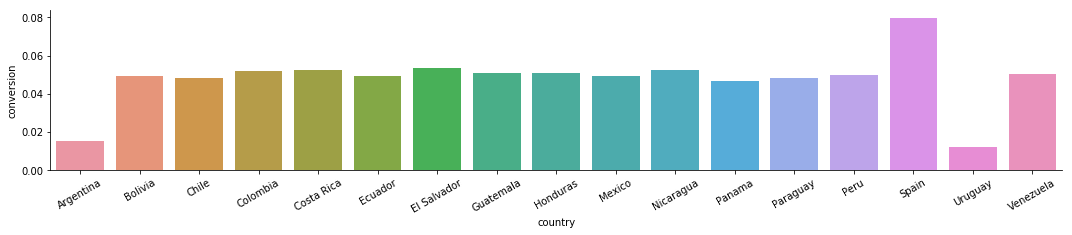

In [368]:
g = sns.factorplot(x = 'country', y = 'conversion', \
               data = data[data['test']==0].groupby('country', as_index = False).conversion.mean(),\
              kind = 'bar', size = 3, aspect = 5)
g.set_xticklabels(rotation=30)

### Step2: Calculate t statistics

#### Hypothesis:
Null Hypothesis: the population mean(conversion rate) of local-translation is the same as the population mean of Spaniard-translation. mu1 = mu2<br>
Alternative Hypothesis:  mu1 != mu2<br>
And let's use a signifigance level alpha < 0.05 and we're doing a two-tail test

Breake the data into two groups: controlled and experiment group, without Spain data

In [309]:
controll = data[(data['test']==0)&(data['country']!='Spain')]
exp = data[(data['test']==1)&(data['country']!='Spain')]

#### I will use below example to explain Simpson's Paradox

Compare the control and test groups in all country as a whole

In [314]:
# calculate the mean conversion rate for both groups
print ('The avg conversion rate of controll group: {}'.format(controll.conversion.mean()))
print ('The avg conversion rate of exp group: {}'.format(exp.conversion.mean()))

The avg conversion rate of controll group: 0.04829179055749524
The avg conversion rate of exp group: 0.043411161678422794


In [315]:
# calculate t statistics and p value
t,p = stats.ttest_ind(a=controll['conversion'], b=exp['conversion'],equal_var = False)

In [316]:
print (t,p)

7.35389520308 1.92891785778e-13


If we look at the above analysis, the test group is doing significally worse than control group. It seems that after the change, the conversion rates drops significantly!<br>
When things seems not in the way that we expected, there must be something wrong.<br>
Let's dive deeper into the sample

In [319]:
# the conversion rate in test group are constantly ower throughout the days
controll.groupby('date').conversion.mean()

date
2015-11-30    0.051204
2015-12-01    0.046249
2015-12-02    0.048472
2015-12-03    0.049255
2015-12-04    0.047085
Name: conversion, dtype: float64

In [320]:
exp.groupby('date').conversion.mean()

date
2015-11-30    0.043878
2015-12-01    0.041371
2015-12-02    0.044216
2015-12-03    0.043898
2015-12-04    0.043459
Name: conversion, dtype: float64

In [321]:
c_country = pd.Series(controll.groupby('country').size(), name = 'controll')

In [322]:
e_country = pd.Series(exp.groupby('country').size(), name = 'exp')

In [323]:
pd.concat([c_country,e_country],axis = 1)

,controll,exp
country,,
Argentina,9356,37377
Bolivia,5550,5574
Chile,9853,9884
Colombia,27088,26972
Costa Rica,2660,2649
Ecuador,8036,7859
El Salvador,4108,4067
Guatemala,7622,7503
Honduras,4361,4207


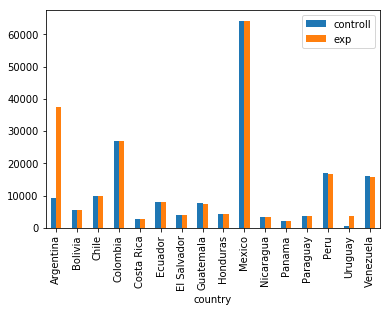

In [324]:
(pd.concat([c_country,e_country],axis = 1)).plot(kind='bar')

The sample is biased. For example, Argentina and Uruguay's exp group has a larger sample size than the control group

#### We should look at the comparison in each segment(country)

In [327]:
# get the conversion rate for each country in controll group
c_cr = pd.Series(controll.groupby('country').conversion.mean(),name = 'controll conversion rate')

In [328]:
# get the conversion rate for each country in experiment group
e_cr = pd.Series(exp.groupby('country').conversion.mean(), name = 'exp conversion rate')

In [329]:
c_cr

country
Argentina      0.015071
Bolivia        0.049369
Chile          0.048107
Colombia       0.052089
Costa Rica     0.052256
Ecuador        0.049154
El Salvador    0.053554
Guatemala      0.050643
Honduras       0.050906
Mexico         0.049495
Nicaragua      0.052647
Panama         0.046796
Paraguay       0.048493
Peru           0.049914
Uruguay        0.012048
Venezuela      0.050344
Name: controll conversion rate, dtype: float64

Get all the t, and p values for each country

In [330]:
country_list =list(controll.country.unique())

In [331]:
country_list

['Mexico',
 'Colombia',
 'El Salvador',
 'Nicaragua',
 'Peru',
 'Chile',
 'Argentina',
 'Ecuador',
 'Venezuela',
 'Guatemala',
 'Honduras',
 'Panama',
 'Paraguay',
 'Costa Rica',
 'Bolivia',
 'Uruguay']

In [332]:
lin = []
for c in country_list:
    t,p = stats.ttest_ind(a=controll[controll['country']==c].conversion, \
                          b=exp[exp['country']==c].conversion,equal_var = False)
    #t_stat.append(t)
    #p_value.append(p)
    lin = lin + [[t,p]]

In [333]:
lin

[[-1.3866735952325449, 0.16554372211039645],
 [0.79999178223708245, 0.42371907413141141],
 [1.1549940887832975, 0.2481266743266678],
 [-0.27880850314757355, 0.78040038589047944],
 [-0.28982358545511927, 0.77195298851535477],
 [-1.0303728644383661, 0.30284764308444695],
 [0.9638326839451179, 0.33514654687468659],
 [0.048257426198918048, 0.96151169060066222],
 [0.56261424690935702, 0.57370152343872549],
 [0.56496315146205101, 0.57210720819120686],
 [0.72013284328217941, 0.47146285652575859],
 [-0.378167043801935, 0.70532683727258894],
 [-0.14628996329799995, 0.88369650349623641],
 [-0.40176067651471453, 0.68787635370739864],
 [0.35995817724402418, 0.71888524684510746],
 [-0.15134316107212104, 0.87976397365142245]]

In [334]:
stats = pd.DataFrame(lin, columns=['t', 'p'], index = country_list)

In [335]:
stats

,t,p
Mexico,-1.386674,0.165544
Colombia,0.799992,0.423719
El Salvador,1.154994,0.248127
Nicaragua,-0.278809,0.780400
Peru,-0.289824,0.771953
Chile,-1.030373,0.302848
Argentina,0.963833,0.335147
Ecuador,0.048257,0.961512
Venezuela,0.562614,0.573702
Guatemala,0.564963,0.572107


In [336]:
pd.concat([c_cr,e_cr,stats],axis = 1)

,controll conversion rate,exp conversion rate,t,p
Argentina,0.015071,0.013725,0.963833,0.335147
Bolivia,0.049369,0.047901,0.359958,0.718885
Chile,0.048107,0.051295,-1.030373,0.302848
Colombia,0.052089,0.050571,0.799992,0.423719
Costa Rica,0.052256,0.054738,-0.401761,0.687876
Ecuador,0.049154,0.048988,0.048257,0.961512
El Salvador,0.053554,0.047947,1.154994,0.248127
Guatemala,0.050643,0.048647,0.564963,0.572107
Honduras,0.050906,0.047540,0.720133,0.471463
Mexico,0.049495,0.051186,-1.386674,0.165544


### Conclusion:
If we look at the A/B test results in each segment, we can see that the p values is not less than the alpha 0.05, which means that we cannot reject null hypothesis. <br><br>
Therefore, there is no significant improvement of the converstion rate after the change.<br><br>
Also, it's not becoming worse after the change.

#### Some extra
Below is the step by step calculation of t-statistics not using stats.ttest_ind() function

In [337]:
# take Mexico as an example
controll_m = controll[controll['country']=='Mexico']
exp_m = exp[exp['country']=='Mexico']

Calculate sample size

In [338]:
na = len(controll_m)
nb = len(exp_m)

In [339]:
print ('Sample size of controll group: {}'.format(na))
print ('Sample size of experiment group: {}'.format(nb))

Sample size of controll group: 64209
Sample size of experiment group: 64275


Degree of freedom

In [340]:
df = na+nb-2
print (df)

128482


Calculate conversion rate(sample mean) for controlled and exp group for Mexico

In [341]:
xa = controll_m.conversion.mean()
xb = exp_m.conversion.mean()

In [343]:
# the conversion rate of test group is 0.17% higher, but is it significant enough? or it's due to chance.
print ('Conversion rate of controll group: {}'.format(xa))
print ('Conversion rate of experiment group: {}'.format(xb))

Conversion rate of controll group: 0.04949461913438926
Conversion rate of experiment group: 0.05118630882924932


Calculate standard deviation

In [344]:
# in ipython notebook, use shift+tab to get function details(more tab more details)
# ddof is set default of 1. 1 is for sample std, 0 for population std
sa = controll_m.conversion.std()
sb = exp_m.conversion.std()

In [345]:
# calculate standard error
se = pow(sa,2)/na+pow(sb,2)/nb

In [346]:
t = (xb-xa)/np.sqrt(se)

In [347]:
print (t)

1.38667359523


Look up t-table of alpha = 0.05 and df = 128482 to get the critical value. t = 1.96<br>
Since 1.39 is not greater than the critical value 1.96. so we cannot reject null